In [3]:
import tensorflow as tf
import numpy as np  
import pandas as pd  
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
np.random.seed(10) 
from keras.datasets import mnist  

In [4]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()  
print("\t[Info] train data={:7,}".format(len(X_train_image)))  
print("\t[Info] test  data={:7,}".format(len(X_test_image)))  


	[Info] train data= 60,000
	[Info] test  data= 10,000


In [5]:
print("\t[Info] Shape of train data=%s" % (str(X_train_image.shape)))  
print("\t[Info] Shape of train label=%s" % (str(y_train_label.shape))) 

	[Info] Shape of train data=(60000, 28, 28)
	[Info] Shape of train label=(60000,)


In [6]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示.  
    plt.show() 

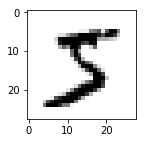

In [7]:
plot_image(X_train_image[0])

In [7]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

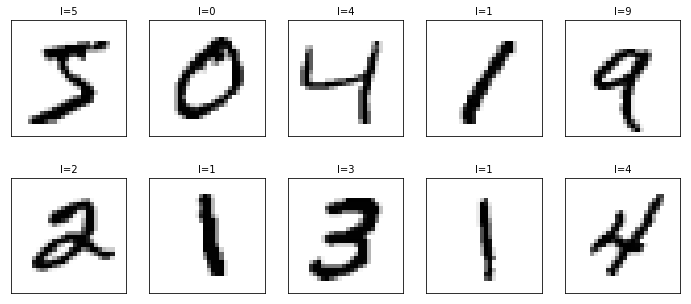

In [8]:
plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)


In [9]:
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')  
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')  
print("\t[Info] xTrain: %s" % (str(x_Train.shape)))  
print("\t[Info] xTest: %s" % (str(x_Test.shape)))  
  
# Normalization  
x_Train_norm = x_Train/255  
x_Test_norm = x_Test/255  

	[Info] xTrain: (60000, 784)
	[Info] xTest: (10000, 784)


In [10]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=1024, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  

	[Info] Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________



In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
y_TrainOneHot = np_utils.to_categorical(y_train_label) 
y_TestOneHot = np_utils.to_categorical(y_test_label) 

In [13]:
y_train_label[0]

5

In [14]:
y_TrainOneHot[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [15]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.2893 - acc: 0.9170 - val_loss: 0.1491 - val_acc: 0.9591
Epoch 2/10
 - 4s - loss: 0.1151 - acc: 0.9665 - val_loss: 0.1061 - val_acc: 0.9681
Epoch 3/10
 - 4s - loss: 0.0735 - acc: 0.9787 - val_loss: 0.0891 - val_acc: 0.9735
Epoch 4/10
 - 4s - loss: 0.0498 - acc: 0.9854 - val_loss: 0.0871 - val_acc: 0.9738
Epoch 5/10
 - 4s - loss: 0.0345 - acc: 0.9906 - val_loss: 0.0764 - val_acc: 0.9756
Epoch 6/10
 - 5s - loss: 0.0239 - acc: 0.9940 - val_loss: 0.0760 - val_acc: 0.9776
Epoch 7/10
 - 5s - loss: 0.0178 - acc: 0.9960 - val_loss: 0.0747 - val_acc: 0.9787
Epoch 8/10
 - 5s - loss: 0.0125 - acc: 0.9973 - val_loss: 0.0733 - val_acc: 0.9783
Epoch 9/10
 - 5s - loss: 0.0080 - acc: 0.9990 - val_loss: 0.0728 - val_acc: 0.9795
Epoch 10/10
 - 5s - loss: 0.0057 - acc: 0.9993 - val_loss: 0.0695 - val_acc: 0.9812


In [16]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

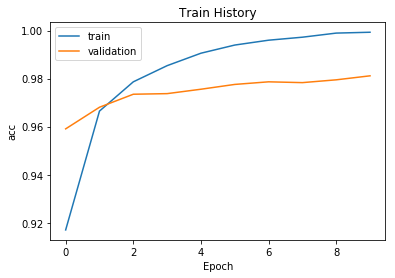

In [17]:
show_train_history(train_history, 'acc', 'val_acc')  

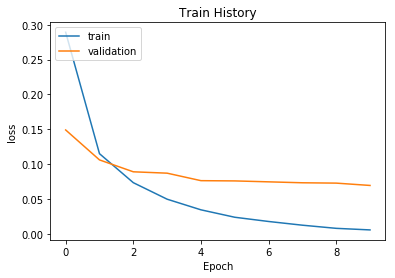

In [18]:

show_train_history(train_history, 'loss', 'val_loss')  

In [19]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 1s 68us/step

	[Info] Accuracy of testing data = 98.2%


	[Info] Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4352 - acc: 0.8864 - val_loss: 0.2248 - val_acc: 0.9399
Epoch 2/10
 - 1s - loss: 0.1923 - acc: 0.9452 - val_loss: 0.1617 - val_acc: 0.9564
Epoch 3/10
 - 1s - loss: 0.1363 - acc: 0.9617 - val_loss: 0.1299 - val_acc: 0.9634
Epoch 4/10
 - 1s - loss: 0.1050 - acc: 0.9702 - val_loss: 0.1134 - val_acc: 0.9668
Epoch 5/10
 - 1s - loss: 0.0824 - acc: 0.9766 - val_loss: 0.1008 - val_acc: 0.9692
Epoch 6/10
 - 1s - loss: 0.0675 - acc: 0.98

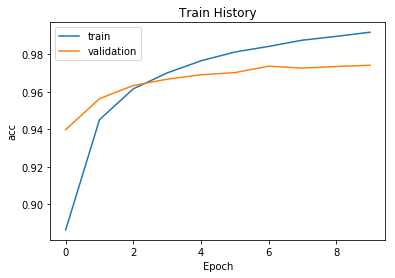

In [24]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history1 = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  
show_train_history(train_history1, 'acc', 'val_acc')  

In [25]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  



10000/10000 [==============================] - 0s 31us/step

	[Info] Accuracy of testing data = 97.8%


	[Info] Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 10s - loss: 0.2536 - acc: 0.9238 - val_loss: 0.1416 - val_acc: 0.9585
Epoch 2/10
 - 10s - loss: 0.0946 - acc: 0.9727 - val_loss: 0.0980 - val_acc: 0.9710
Epoch 3/10
 - 9s - loss: 0.0561 - acc: 0.9834 - val_loss: 0.0861 - val_acc: 0.9746
Epoch 4/10
 - 10s - loss: 0.0367 - acc: 0.9891 - val_loss: 0.0745 - val_acc: 0.9774
Epoch 5/10
 - 10s - loss: 0.0242 - acc: 0.9935 - val_loss: 0.0760 - val_acc: 0.9781
Epoch 6/10
 - 10s - loss: 0.0162 - 

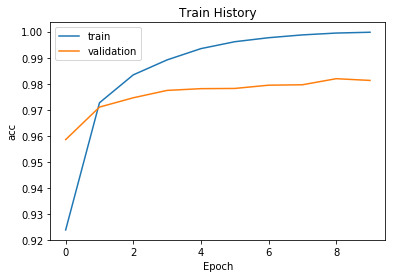

10000/10000 [==============================] - 1s 109us/step

	[Info] Accuracy of testing data = 98.1%


In [26]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=2048, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history1 = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  
show_train_history(train_history1, 'acc', 'val_acc')  
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
